In [1]:

"""
Created on Sun Oct 14 14:28:29 2018

@author: Morteza HASHEMI
"""
#-------Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#-------Load dataset into Pandas Dataframe 

views = pd.read_csv("C:/Users/Spa-Francorchamps/Downloads/eco_v0.2/all_product_2018.csv")
carts = pd.read_csv("C:/Users/Spa-Francorchamps/Downloads/eco_v0.2/all_order_2018.csv")

In [2]:
#-------Convert timestamp to human readable time units

carts.index = pd.to_datetime(carts['timestamp'], unit='ms')
views.index = pd.to_datetime(views['timestamp'], unit='ms')

carts = carts.drop(['timestamp'], axis=1)
views = views.drop(['timestamp'], axis=1)


#-------Small optimization & cleaning

carts.dropna(subset=["product_ids"], inplace=True)
views['product_id'] = views['product_id'].astype('int')

In [3]:
carts.head()

,customer_id,product_ids,cart_price
timestamp,,,
2017-12-31 23:41:11.712,401a01d8c3a64e11,188|1439,28.89
2018-01-01 11:56:16.242,3e87edf753a9f1a1,2790,199.95
2018-01-01 13:26:38.703,bd750602eac31a94,157,11.20
2018-01-01 13:40:24.978,3e083e3a130b21b2,647,17.85
2018-01-01 15:57:46.958,30fdc97b0eb7761b,2,28.70


In [4]:
#------Formatting "product_ids" column

lst = []
index = []

for row in carts.iterrows():
    vals = row[1].values
    product_ids = vals[1]
    for id_prod in product_ids.split("|"):
        lst.append([vals[0], id_prod, vals[2]])
        index.append(row[0])
#         current = pd.DataFrame([[vals[0], id_prod, vals[2]]], columns=cols)
#         current.index = [row[0]] 
#         print(current)

cols = carts.columns.tolist()
cart_flatten = pd.DataFrame(lst, columns=cols, index=index)
cart_flatten.head()

,customer_id,product_ids,cart_price
2017-12-31 23:41:11.712,401a01d8c3a64e11,188,28.89
2017-12-31 23:41:11.712,401a01d8c3a64e11,1439,28.89
2018-01-01 11:56:16.242,3e87edf753a9f1a1,2790,199.95
2018-01-01 13:26:38.703,bd750602eac31a94,157,11.20
2018-01-01 13:40:24.978,3e083e3a130b21b2,647,17.85


In [5]:
#------Convert the product_ids to int
cart_flatten['product_ids'] = cart_flatten['product_ids'].astype('int')
cart_flatten.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9666 entries, 2017-12-31 23:41:11.712000 to 2018-10-03 11:28:07.719000
Data columns (total 3 columns):
customer_id    9666 non-null object
product_ids    9666 non-null int32
cart_price     9666 non-null float64
dtypes: float64(1), int32(1), object(1)
memory usage: 264.3+ KB


In [6]:
#-----------Merge the two datasets (cart_flatten and views)

mergedProd = cart_flatten.merge(views, how='left', left_on='product_ids', right_on='product_id', 
                                suffixes=['_cart', '_view'])


# #-----------Locating rows where the "product_id" is null

# mergedProd[mergedProd['product_id'].isnull()]


# #----------Drop Na rows

# mergedProd.dropna(subset=['product_id'], inplace=True)

mergedProd.head()

,customer_id_cart,product_ids,cart_price,customer_id_view,product_id,full_price,actual_price
0,401a01d8c3a64e11,188,28.89,7b4464d06d7ffbfb,188.0,4.950413,4.950413
1,401a01d8c3a64e11,188,28.89,75dd9fe3daae2927,188.0,4.950413,4.950413
2,401a01d8c3a64e11,188,28.89,ba557ca06e436eaf,188.0,4.950413,4.950413
3,401a01d8c3a64e11,188,28.89,485fbe5297fbeefa,188.0,4.950413,4.950413
4,401a01d8c3a64e11,188,28.89,c0e3a1443cb5d177,188.0,4.950413,4.950413


In [203]:
print(mergedProd.info())
print(views.info())
print(carts.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7726292 entries, 0 to 7726291
Data columns (total 7 columns):
customer_id_cart    object
product_ids         int32
cart_price          float64
customer_id_view    object
product_id          float64
full_price          float64
actual_price        float64
dtypes: float64(4), int32(1), object(2)
memory usage: 442.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 827545 entries, 2017-12-31 23:00:21.389000 to 2018-10-03 11:29:30.731000
Data columns (total 4 columns):
customer_id     827545 non-null object
product_id      827545 non-null int32
full_price      827451 non-null float64
actual_price    827451 non-null float64
dtypes: float64(2), int32(1), object(1)
memory usage: 68.4+ MB
None
        cart_price
count  5149.000000
mean    130.288153
std     175.639687
min       0.500000
25%      35.000000
50%      68.920000
75%     159.400000
max    4158.100000


In [8]:
groupedView = views.groupby('product_id')
groupedCart = cart_flatten.groupby('product_ids')

In [9]:
numOfViewsPerProd = groupedView.count()['customer_id']
numOfPurchasesPerProd = groupedCart.count()['customer_id']
numOfPurchasesPerProd.head()
numOfViewsPerProd.head()

product_id
2     3762
3     3960
8       11
14    1164
15     156
Name: customer_id, dtype: int64

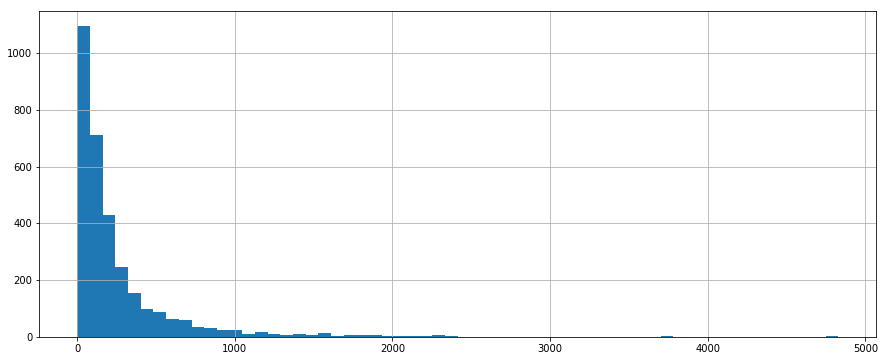

In [10]:
numOfViewsPerProd.hist(bins=60, figsize=(15,6))

In [11]:
numOfViewsPerProd.describe()

count    3181.000000
mean      260.152468
std       403.532928
min         1.000000
25%        57.000000
50%       132.000000
75%       289.000000
max      4828.000000
Name: customer_id, dtype: float64

In [11]:
numOfViewsPerProd.median()

132.0

In [13]:
numOfViewsPerProd[numOfViewsPerProd<10].count()

158

In [14]:
numOfPurchasesPerProd.describe()

count    1910.000000
mean        5.060733
std        11.945023
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       165.000000
Name: customer_id, dtype: float64

In [99]:
numOfPurchasesPerProd.median()

2.0

In [12]:
indRemove = numOfViewsPerProd[numOfViewsPerProd<10].index
indRemove

Int64Index([  36,   70,   80,  231,  283,  286,  323,  346,  397,  461,
            ...
            3843, 3844, 3845, 3848, 3851, 3852, 3854, 3855, 3856, 3857],
           dtype='int64', name='product_id', length=158)

In [13]:
numOfPurchasesPerProd[~numOfPurchasesPerProd.index.isin(indRemove)].count()

1883

In [14]:
normalizedViews = numOfViewsPerProd[-(numOfViewsPerProd<10)]
normalizedPurchases = numOfPurchasesPerProd[~numOfPurchasesPerProd.index.isin(indRemove)]

In [15]:
df = pd.DataFrame({'view': normalizedViews, 'purchase': normalizedPurchases})

In [16]:
df.head()

,view,purchase
2,3762.0,126.0
3,3960.0,6.0
8,11.0,NaN
14,1164.0,11.0
15,156.0,2.0


In [17]:
purchasePerView = df['purchase'] / df['view']
viewPerPurchase = df['view'] / df['purchase']
purchasePerView.head()

2     0.033493
3     0.001515
8          NaN
14    0.009450
15    0.012821
dtype: float64

In [18]:
print("Best Seller Ratio: {}".format(purchasePerView.max()))
print("Least Seller Ratio: {}".format(viewPerPurchase.max()))

Best Seller Ratio: 0.5
Least Seller Ratio: 3571.0


<BarContainer object of 3024 artists>

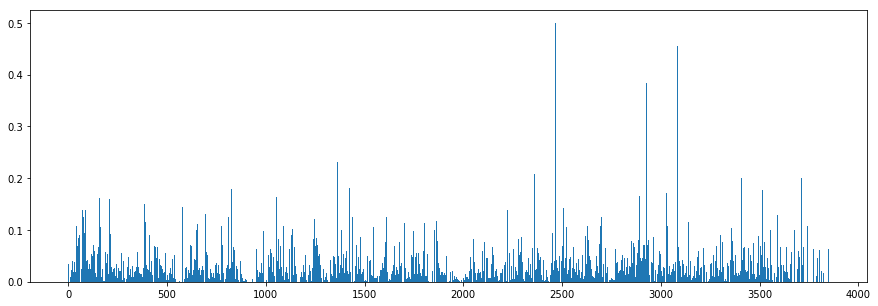

In [20]:
plt.figure(figsize=(15,5))
plt.bar(purchasePerView.index, purchasePerView, width=5)

<BarContainer object of 3024 artists>

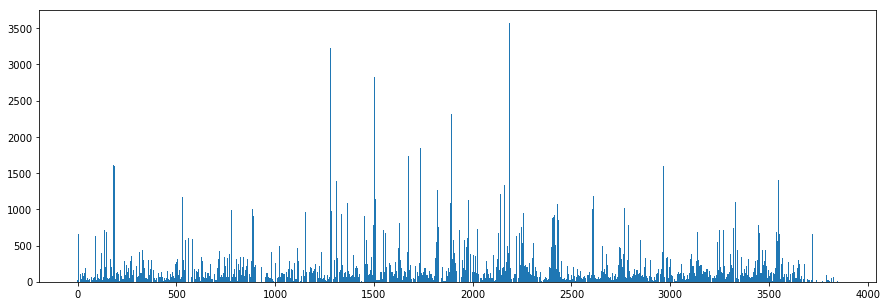

In [21]:
plt.figure(figsize=(15,5))
plt.bar(viewPerPurchase.index, viewPerPurchase, width=5)

In [72]:
viewPerPurchase.nlargest(5)

2184    3571.0
1282    3225.0
1501    2820.0
1893    2313.0
1738    1849.0
dtype: float64

In [209]:
cart_flatten[cart_flatten['product_ids'] == 2469]

,customer_id,product_ids,cart_price
2018-01-31 15:48:26.388,6e7792695c700721,2469,42.88
2018-01-31 15:51:41.150,6e7792695c700721,2469,42.88
2018-01-31 15:51:43.618,6e7792695c700721,2469,42.88
2018-01-31 15:53:06.415,6e7792695c700721,2469,42.88
2018-01-31 15:53:31.383,6e7792695c700721,2469,42.88
2018-01-31 15:53:33.415,6e7792695c700721,2469,42.88
2018-01-31 15:54:00.051,6e7792695c700721,2469,42.88
2018-01-31 15:54:40.887,6e7792695c700721,2469,42.88
2018-01-31 15:54:43.218,6e7792695c700721,2469,42.88
2018-01-31 15:55:56.298,6e7792695c700721,2469,42.88


In [103]:
purchasePerView.nlargest(10)

2469    0.500000
3085    0.454545
2929    0.384615
1364    0.230769
2359    0.208333
3406    0.200000
3714    0.200000
1425    0.181818
825     0.179348
3517    0.177215
dtype: float64

In [101]:
noSell = views[views['product_id'] == 2184]
noSell.head()

,customer_id,product_id,full_price,actual_price
timestamp,,,,
2018-01-01 00:23:49.626,a02b997bf5257800,2184,321.487603,321.487603
2018-01-01 00:37:32.533,a02b997bf5257800,2184,321.487603,321.487603
2018-01-01 13:10:54.466,bc5ba20b1f3183f1,2184,321.487603,321.487603
2018-01-01 13:11:38.016,bc5ba20b1f3183f1,2184,321.487603,321.487603
2018-01-01 15:07:16.085,081c3a51286a088a,2184,321.487603,321.487603


In [97]:
noSellByDay = noSell.resample('W').count()['customer_id']

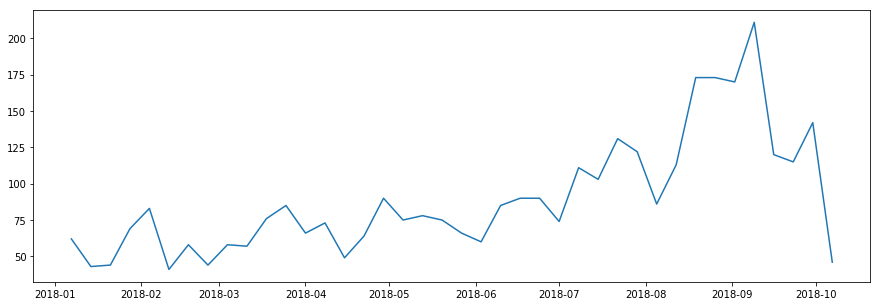

In [98]:
plt.figure(figsize=(15,5))
plt.plot(noSellByDay.index, noSellByDay)

In [108]:
# product id 825 with purchase ration: 0.179348

bestSellerCart = cart_flatten[cart_flatten['product_ids'] == 825]
bestSellerCart.head()

,customer_id,product_ids,cart_price
2018-01-04 16:50:39.608,80df2f97917306bb,825,42.00
2018-01-19 17:27:35.528,ff56e18147723fa4,825,879.84
2018-02-05 22:20:38.771,0030800434897a86,825,30.90
2018-02-23 17:19:49.206,548d7b3e16143c18,825,1391.92
2018-03-20 15:28:46.281,4cc26592cce2de11,825,38.20


In [107]:
bestSellerView = views[views['product_id'] == 825]
bestSellerView.head()

,customer_id,product_id,full_price,actual_price
timestamp,,,,
2018-01-02 22:34:16.429,47350a2ef01a48cf,825,1.652893,1.652893
2018-01-04 12:06:05.701,1024d82c0cd28c4e,825,1.652893,1.652893
2018-01-04 16:45:52.040,80df2f97917306bb,825,1.652893,1.652893
2018-01-06 01:49:42.030,b10758cb254bc4a1,825,1.652893,1.652893
2018-01-10 01:33:00.186,b10c18fb4fcb6570,825,1.652893,1.652893


In [201]:
bestSellerCartByWeek = bestSellerCart.resample('W').count()['customer_id']
bestSellerViewByWeek = bestSellerView.resample('W').count()['customer_id']

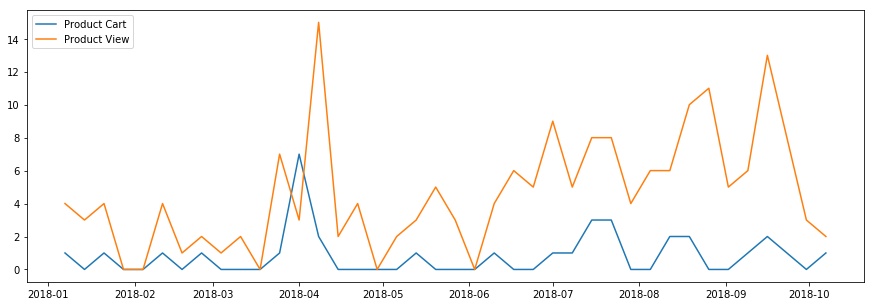

In [202]:
plt.figure(figsize=(15,5))
plt.plot(bestSellerCartByWeek.index, bestSellerCartByWeek, label='Product Cart')
plt.plot(bestSellerViewByWeek.index, bestSellerViewByWeek, label='Product View')
plt.legend(loc='upper left')

In [130]:
df['purchase'].nlargest()

44      165.0
47      154.0
1129    154.0
46      153.0
53      145.0
Name: purchase, dtype: float64

In [136]:
cartID44 = cart_flatten[cart_flatten['product_ids'] == 44]
viewID44 = views[views['product_id'] == 44]

In [151]:
cartID44ByDay = cartID44.resample('W').count()['customer_id']
viewID44ByDay = viewID44.resample('W').count()['customer_id']

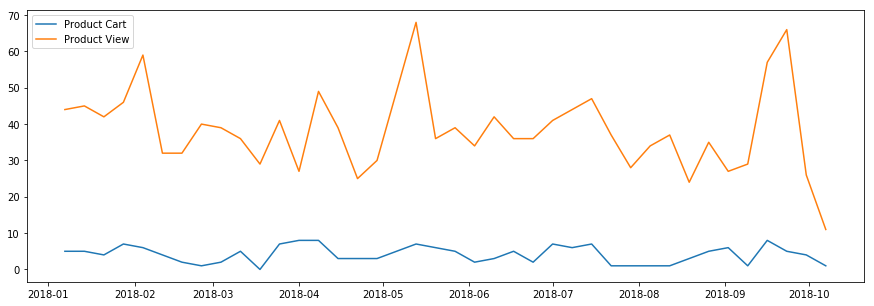

In [152]:
plt.figure(figsize=(15,5))
plt.plot(cartID44ByDay.index, cartID44ByDay, label='Product Cart')
plt.plot(viewID44ByDay.index, viewID44ByDay, label='Product View')
plt.legend(loc='upper left')

In [160]:
cartID_1129 = cart_flatten[cart_flatten['product_ids'] == 1129]
viewID_1129 = views[views['product_id'] == 1129]

In [170]:
cartID_1129_ByDay = cartID_1129.resample('2W').count()['customer_id']
viewID_1129_ByDay = viewID_1129.resample('2W').count()['customer_id']

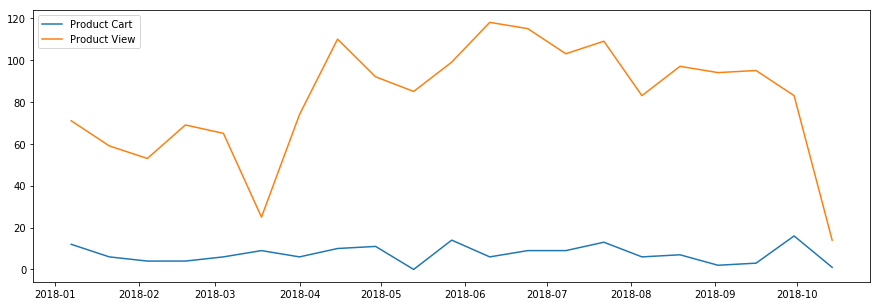

In [171]:
plt.figure(figsize=(15,5))
plt.plot(cartID_1129_ByDay.index, cartID_1129_ByDay, label='Product Cart')
plt.plot(viewID_1129_ByDay.index, viewID_1129_ByDay, label='Product View')
plt.legend(loc='upper left')

In [187]:
a = views['jan 2018':'sep 2018']

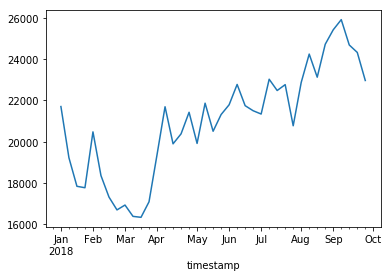

In [199]:
a.resample('W').count()['customer_id'].plot()

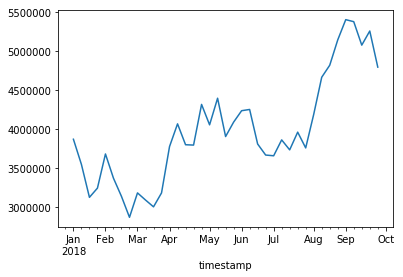

In [200]:

a.resample('W').sum()['actual_price']

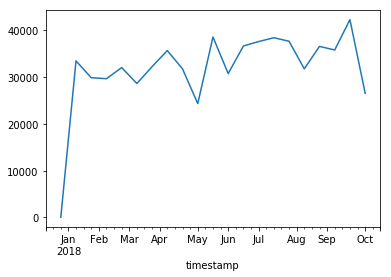

In [206]:
carts.resample('2W').sum()['cart_price'].plot()